In [1]:
from numpy import *

import matplotlib
matplotlib.style.use('publication23')

import QuarkTM
import TMQGP as tm

qrange = linspace(0, 5.5, 251)
erange = linspace(-5.5, 5.5, 1001)

In [2]:
import os

In [3]:
os.getpid()

312033

# Fermions QP pressure

In [4]:
epss = [1e-2, 1e-3, 1e-4, 1e-5]

In [23]:
qs = [
    QuarkTM.Particle(0.6, qrange, erange, stat='f', eps=eps)
    for eps in epss
]

In [24]:
Trange = linspace(0.05, .7, 20)

In [25]:
pss = []

In [26]:
for q in qs:
    iImG = tm.Interpolator2D(qrange, erange, ascontiguousarray(imag(q.Gtab)))
    iReG = tm.Interpolator2D(qrange, erange, ascontiguousarray(real(q.Gtab)))
    ps = array([tm.OmQ_F(T, iImG, iReG) for T in Trange])
    pss += [ps]

In [27]:
from scipy.integrate import quad

In [28]:
Pfree = array([quad(lambda z: z*z*T*log(1 + exp(-sqrt(0.6**2 + z**2)/T)) / 2/pi**2, 0, np.inf)[0] for T in Trange])

In [29]:
ps/Trange**4

array([0.93972933, 0.11817924, 0.03647241, 0.02590581, 0.02942585,
       0.03620269, 0.04327803, 0.04975952, 0.05542   , 0.0602566 ,
       0.06433244, 0.06771922, 0.07047945, 0.07266405, 0.0743156 ,
       0.07547215, 0.07617038, 0.07644728, 0.07634084, 0.07588997])

In [30]:
q = qs[1]
qq = qs[-1]

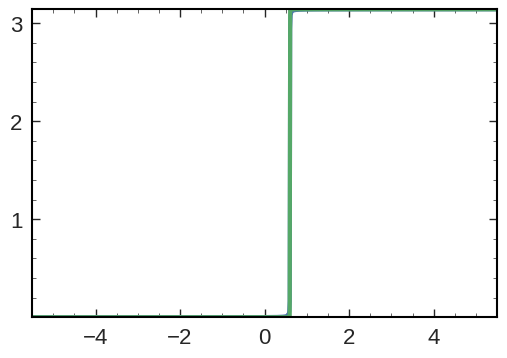

In [31]:
plt.plot(erange, [tm.delta(e, 1e-3, q.iImG, q.iReG) for e in erange])
plt.plot(erange, [tm.delta(e, 1e-3, qq.iImG, qq.iReG) for e in erange])

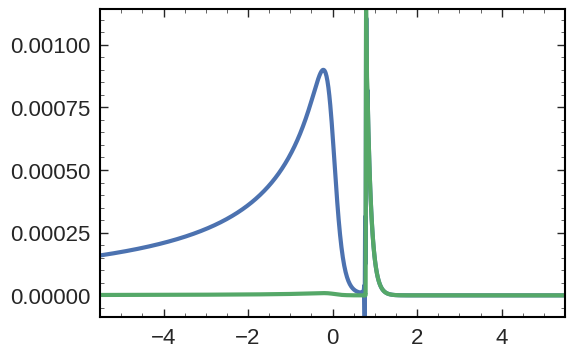

In [32]:
plt.plot(erange, [tm.delta(e, .5, q.iImG, q.iReG)*tm.n_f(e, 0.1) for e in erange])
plt.plot(erange, [tm.delta(e, .5, qq.iImG, qq.iReG)*tm.n_f(e, 0.1) for e in erange])

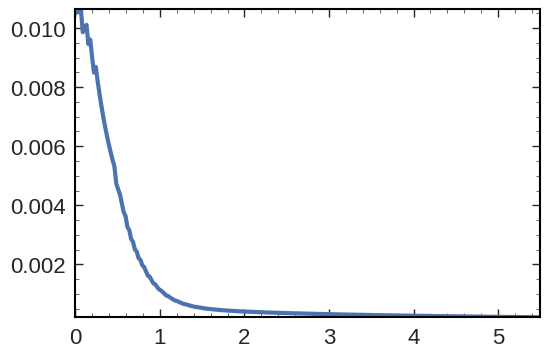

In [33]:
plt.plot(qrange, [tm.OmQ_F_om_int(z, 0.2, q.iImG, q.iReG) for z in qrange])

Text(0, 0.5, '$P/T^4$')

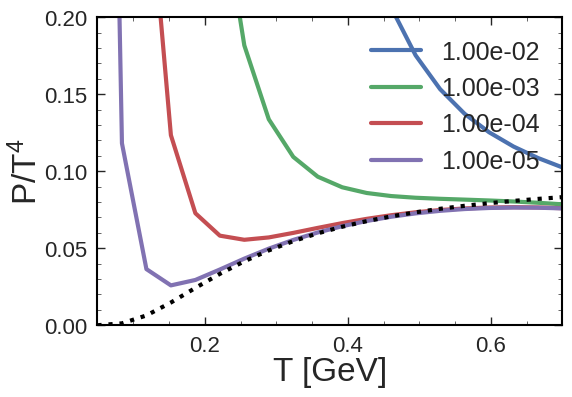

In [34]:
for eps, ps in zip(epss, pss):
    plt.plot(Trange, ps/Trange**4, label='%.2e'%eps)
plt.plot(Trange, Pfree / Trange**4, ls=':', c='black')
# plt.xlim(0.1, .7)

plt.ylim(0, 0.2)
plt.legend()

plt.xlabel('T [GeV]')
plt.ylabel(r'$P/T^4$')

# Boson QP pressure 

In [17]:
Pfree_B = array([quad(lambda z: -z*z*T*log(1 - exp(-sqrt(0.6**2 + z**2)/T)) / 2/pi**2, 0, np.inf)[0] for T in Trange])

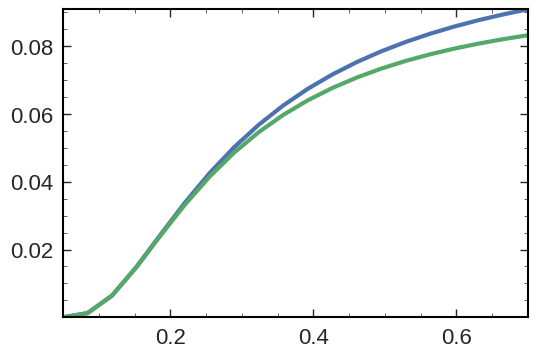

In [18]:
plt.plot(Trange, Pfree_B/Trange**4)
plt.plot(Trange, Pfree/Trange**4)

In [19]:
ps = array([tm.OmQ_B(T, qs[1].iImG, qs[1].iReG) for T in Trange])

(0.0, 0.2)

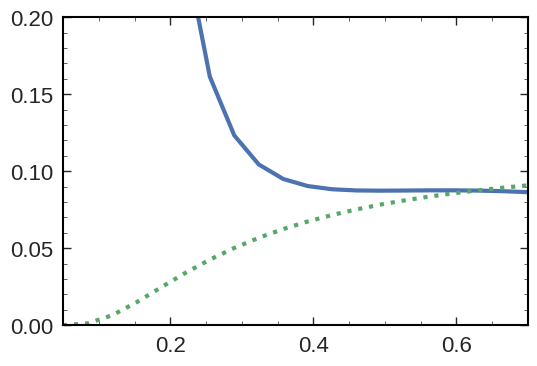

In [20]:
plt.plot(Trange, ps/Trange**4)
plt.plot(Trange, Pfree_B/Trange**4, ls=':')

plt.ylim(0, 0.2)
# plt.xlim(0.1, 0.7)